# Lux AI - Season 2
This is a notebook following [this tutorial](https://www.kaggle.com/code/stonet2000/lux-ai-challenge-season-2-tutorial-python)


In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import numpy as np

from matplotlib import pyplot as plt
from luxai_s2.env import LuxAI_S2

from instashallow.phase2 import place_best_ice, place_near_random_ice
from instashallow.phase2 import _expand_constrained, _expand, _clip, _expand_round, _normalise

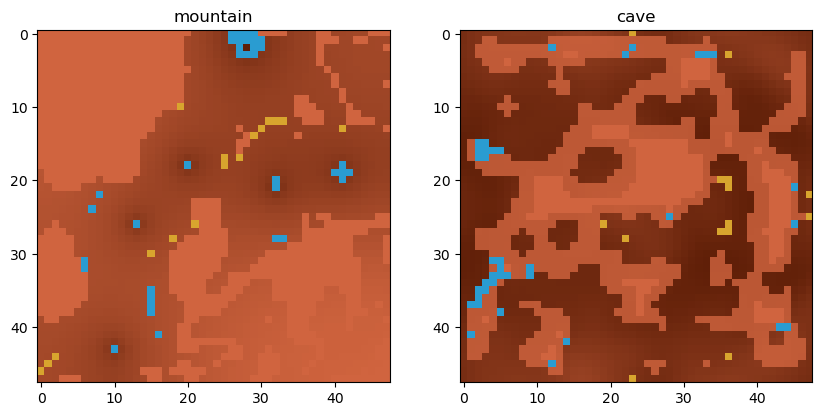

<Figure size 960x720 with 0 Axes>

In [34]:
env = LuxAI_S2() # create the environment object
mountain_obs = env.reset(seed=420)
mountain_map = env.render("rgb_array", width=48, height=48).transpose(1,0,2)
cave_obs = env.reset(seed=1026)
cave_map = env.render("rgb_array", width=48, height=48).transpose(1,0,2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
im1 = ax1.imshow(mountain_map)
ax1.set_title("mountain")
im2 = ax2.imshow(cave_map)
ax2.set_title("cave")
plt.figure(dpi=150)
plt.show()

#cave_obs["player_0"]["board"]["valid_spawns_mask"]
#cave_obs["player_0"]["board"]["ice"]
#cave_obs["player_0"]["board"]["rubble"]
#cave_obs["player_0"]["board"]["factory_occupancy_map"]


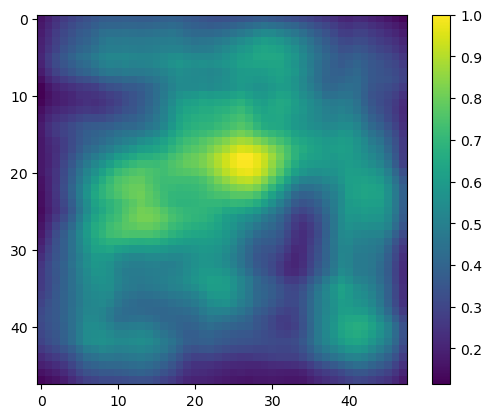

In [54]:
obs = cave_obs["player_0"]

rubble_inv_norm = 1 - _normalise(obs["board"]["rubble"])
rubble_mask = _normalise(_expand(rubble_inv_norm, 5))

plt.imshow(rubble_mask)
plt.colorbar()
plt.show()



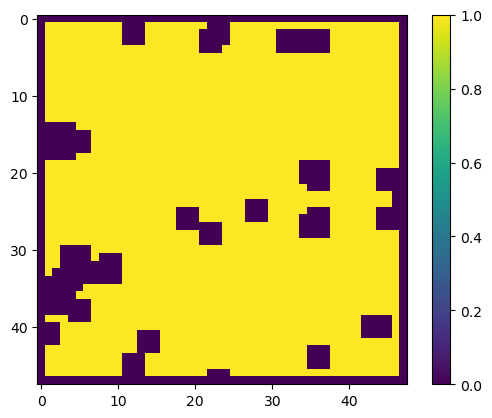

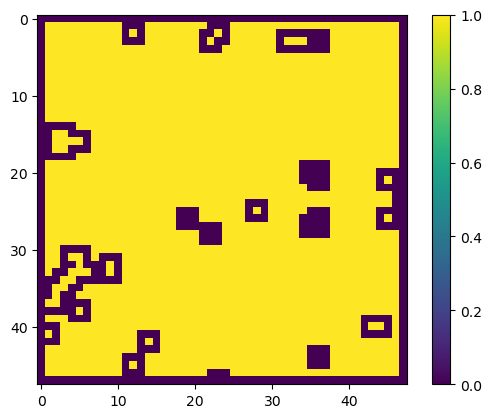

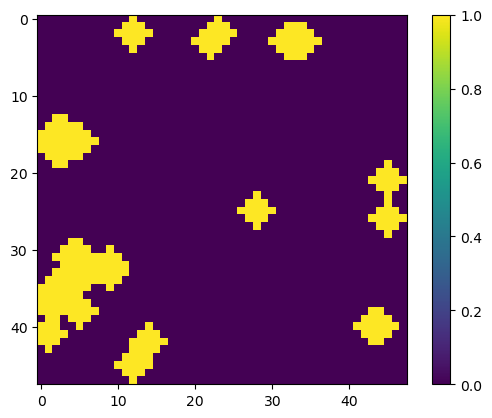

In [71]:
test_mask = np.zeros((48, 48))
test_mask[14:17, 16:19] = 1

valid_mask = obs["board"]["valid_spawns_mask"]
ice = obs["board"]["ice"]
ice_mask = _clip(_expand_round(ice, dist=2))
valid_near_ice_mask = ice_mask * valid_mask


plt.imshow(valid_mask)
plt.colorbar()
plt.show()

plt.imshow(ice + valid_mask)
plt.colorbar()
plt.show()

plt.imshow(ice_mask)
plt.colorbar()
plt.show()



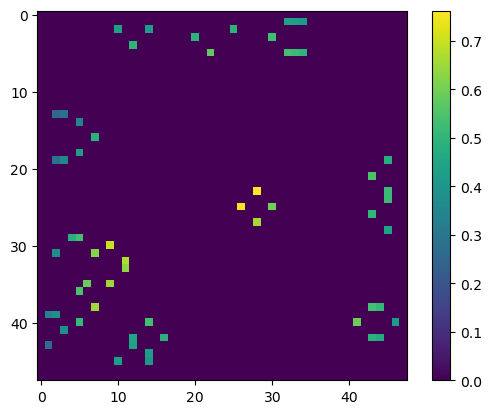

In [37]:
mask = place_best_ice("player_0", cave_obs["player_0"])

plt.imshow(mask)
plt.colorbar()
plt.show()

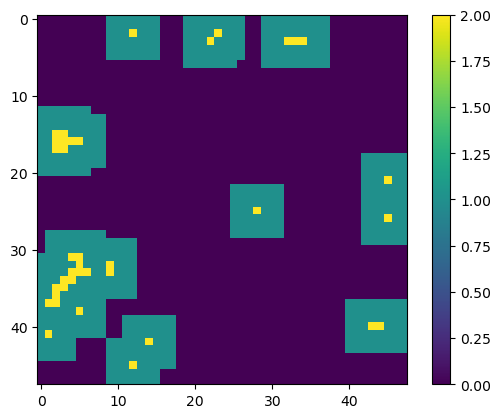

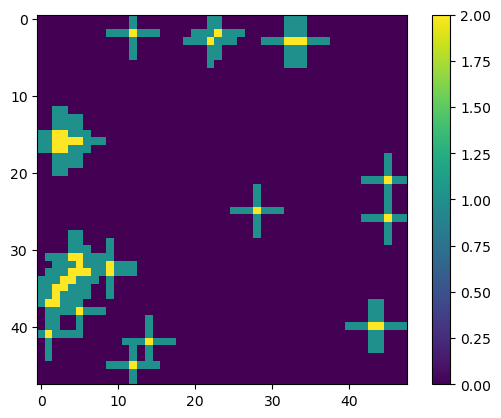

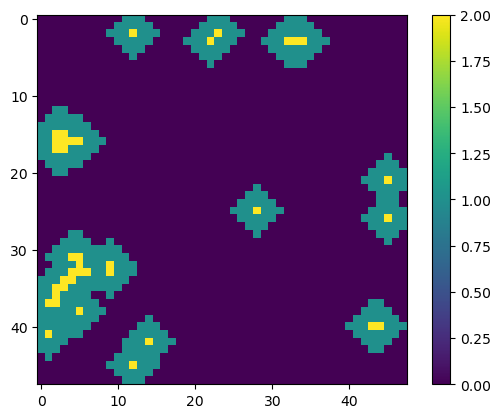

In [30]:
ice = cave_obs["player_0"]["board"]["ice"]

plt.imshow(_clip(_expand(ice, 3)) + ice)
plt.colorbar()
plt.show()

plt.imshow(_clip(_expand_constrained(ice, 3)) + ice)
plt.colorbar()
plt.show()

plt.imshow(_clip(_expand_round(ice, 3)) + ice)
plt.colorbar()
plt.show()

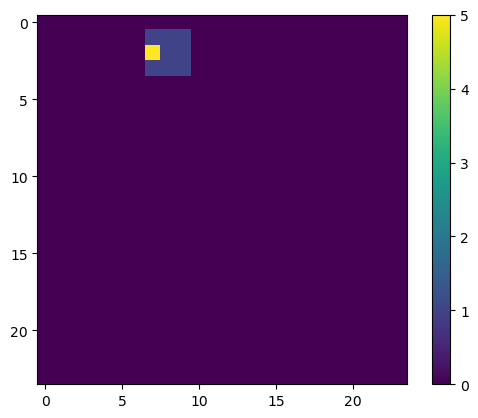

0.0


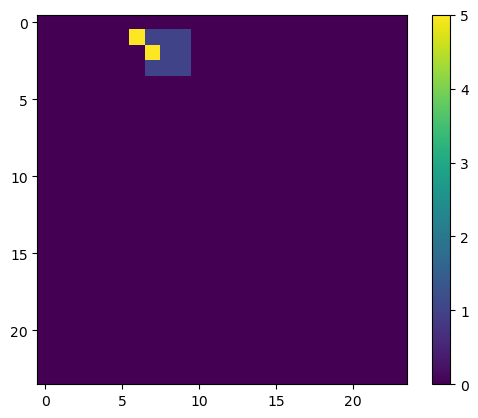

In [103]:
opp_factory_influence = np.zeros((24, 24))
for x, y in [(15, 15), (2, 8)]:
    opp_factory_influence[x-1:x+2, y-1:y+2] = 1
    opp_factory_influence[x, y] = 2


pos = (2, 8)
for x in range(3):
    for y in range(3):
        check_pos = [pos[0] + x - 3 // 2, pos[1] + y - 3 // 2]
        break
    break
     
opp_factory_influence = np.zeros((24, 24))
pos = (2, 8)
opp_factory_influence[pos[0], pos[1]] = 1

diff = np.diff(opp_factory_influence)
pos = np.argwhere(diff == 1)[0]

opp_factory_influence = _clip(_expand(opp_factory_influence, 1))

plt.imshow(opp_factory_influence)
plt.colorbar()
plt.show()

area = 3
for x in range(3):
    for y in range(3):
        check_pos = [pos[0] + x - area // 2, pos[1] + y - area // 2]
        if opp_factory_influence[check_pos[0], check_pos[1]] == 0:
            print(opp_factory_influence[check_pos[0], check_pos[1]])
            done_search = True
            pos = check_pos
            break
    if done_search:
        break

opp_factory_influence[pos[0], pos[1]] = 5

plt.imshow(opp_factory_influence)
plt.colorbar()
plt.show()